In [1]:
from lets_plot import *


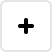
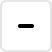
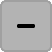
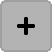
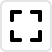
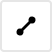
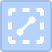
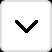
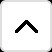
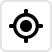
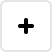
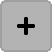
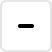
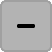
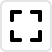
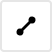
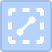
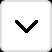
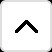
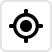

In [2]:
LetsPlot.setup_html()

In [3]:
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


### Sweden and Finland

#### Create countries geocoder.

In [4]:
country_gcoder = geocode_countries(['Finland', 'Sweden'])
country_gcoder.get_geocodes()

id  country found name                              centroid  \
0  54224  Finland    Finland  [27.5426266740774, 64.9500560760498]   
1  52822   Sweden     Sweden  [14.8960665316738, 62.1977656334639]   

                                            position  \
0  [20.5486419796944, 59.8079609870911, 31.586707...   
1  [11.1130450665951, 55.3366836905479, 24.152978...   

                                               limit  
0  [19.3040004372597, 59.7582100331783, 31.586707...  
1  [10.9653197228909, 55.3366836905479, 24.166640...

In [5]:
map_options = theme_void() + coord_map()

#### Plot  boundary polygons.

In [6]:
(ggplot() + 
 geom_polygon(aes(fill='found name'), 
              data=country_gcoder.get_boundaries(),
              tooltips=layer_tooltips().line("^fill"),
              color="white") +
 map_options + 
 scale_fill_hue(name="Country"))

#### Plot ploygons on interactive base-map.

Note: *nbviewer* won't load base-map tiles due to its CSP.

In [7]:
(ggplot() + geom_livemap() + 
 geom_polygon(aes(fill='found name'), 
              data=country_gcoder.get_boundaries(),
              tooltips=layer_tooltips().line("^fill"),
              color="white") +
 scale_fill_hue(name="Country"))

### The World

#### Create countries geocoder.

In [8]:
world_gcoder = geocode_countries()
world_gcoder.get_geocodes().head(3)

id   country found name                              centroid  \
0   9407   Andorra    Andorra   [1.58972340139334, 42.542395144701]   
1  14296  Slovakia   Slovakia  [19.6367939386235, 48.6726971715689]   
2  16239   Austria    Austria  [14.7548074169977, 47.6964113116264]   

                                            position  \
0  [1.41357779502869, 42.4288237094879, 1.7866636...   
1  [16.8331897258759, 47.7314288914204, 22.565710...   
2  [9.5307482779026, 46.3722757995129, 17.1607759...   

                                               limit  
0  [1.41357779502869, 42.4288237094879, 1.7866636...  
1  [16.8331897258759, 47.7314288914204, 22.565710...  
2  [9.5307482779026, 46.3722757995129, 17.1607759...

#### World choropleth.

In [9]:
(ggplot() + 
 geom_polygon(aes(fill='found name'), 
              data=world_gcoder.get_boundaries(), 
              color="white", 
              tooltips=layer_tooltips().line("^fill"),
              show_legend=False) +
 map_options +
 scale_fill_brewer(name="Country", palette="Dark2") + 
 ggsize(900, 600))

### New York State and New York City.

In [10]:
(ggplot() + 
 geom_polygon(map=geocode_states("New York"), fill="#01327A") +
 geom_polygon(map=geocode_cities("New York"), fill="#F2C010") +
 map_options)

### The US states.

#### Create state geocoder for the US [48 contiguous states](https://en.wikipedia.org/wiki/Contiguous_United_States) (aka CONUS).

In [11]:
conus_gcoder = geocode_states('us-48').inc_res()

#### The US choropleth.

In [12]:
conus_plot = (ggplot() +
              geom_polygon(aes(fill='found name'), 
                           data=conus_gcoder.get_boundaries(), 
                           show_legend=False, 
                           color="white",
                           tooltips=layer_tooltips().line("^fill")) +
              map_options +
              scale_fill_brewer(name="State", palette="Dark2") + 
              ggsize(900, 500))
conus_plot

#### Add the states of Alaska and Hawaii.

In [13]:
alaska_plot = (ggplot() + geom_map(map=geocode_states('alaska'), 
                                   fill="light-blue", 
                                   color="#172048",
                                   tooltips=layer_tooltips().line("Alaska")) +
               xlim(-180, -130) + map_options)
hawaii_plot = (ggplot() + geom_map(map=geocode_states('hawaii'), 
                                   fill="#00A954", 
                                   color="#D91023",
                                   tooltips=layer_tooltips().line("Hawaii")) +
               xlim(-162, -154) + ylim(18, 23) +
               map_options)

ggbunch(
    [conus_plot, alaska_plot, hawaii_plot],
    [
        (0, 0, 1, .8),
        (0, .6, .25, .4),
        (.25, .74, .25, .25)
    ],
) + ggsize(800, 500)

### Resolving ambiguity.

#### There are many cities named "Warwick".

In [14]:
# Create a Warwick city geocoder.
world_warwicks = geocode_cities('warwick').allow_ambiguous()

# Plot Warwicks.
(ggplot() + geom_map(map=geocode_countries())
    + geom_point(map=world_warwicks, size=3, color="red")
    + coord_map(xlim=[-130, 20])
    + theme_void())

#### Find one Warwick which is closest to Boston, US.

Note that the name "Boston" is not unique either. Therefore we will need two geocoders: one for Boston, US, and the other for the town of Warwick near Boston.

In [15]:
boston_us = geocode_cities('boston').countries('US')
warwick_near_boston = world_warwicks.where('warwick', closest_to=boston_us)

# Let's also geocode Massachusetts counties. 
counties_ma = geocode_counties().scope("Massachusetts")

In [16]:
(ggplot() + geom_map(map=counties_ma)
    + geom_point(map=warwick_near_boston, size=7, color="red") \
    + geom_polygon(map=boston_us)
    + theme_void())

#### Filter Warwicks using Shaply `box`.

In [17]:
from shapely.geometry import box
warwicks_in_box = (world_warwicks
    .where('warwick', scope=box(-72, 41.5, -71, 42)))

In [18]:
(ggplot() + geom_map(map=counties_ma)
    + geom_rect(xmin=-72, ymin=41.5, xmax=-71, ymax=42, alpha=0, color="magenta", linetype="dashed")
    + geom_point(map=warwicks_in_box, size=7, color="red")
    + geom_polygon(map=boston_us)
    + theme_void())

#### Explore the details on an interactive map.

Note: nbviewer won't load base-map tiles due to its CSP.

In [19]:
(ggplot() + geom_livemap()
    + geom_rect(xmin=-72, ymin=41.5, xmax=-71, ymax=42, alpha=0, color="magenta", linetype="dashed")
    + geom_point(map=warwicks_in_box, size=7, color="red")
    + geom_polygon(map=boston_us))